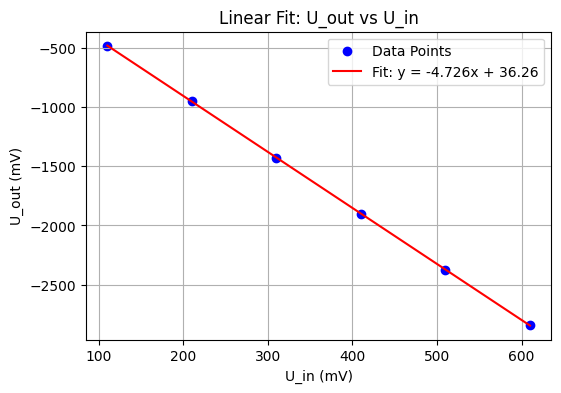

,Parameter,Value
0,Slope,-4.725714
1,Intercept,36.257143


In [1]:
#m1 inv_amp gain

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Given data
U_in = np.array([110, 210, 310, 410, 510, 610]).reshape(-1, 1)
U_out = np.array([-484, -955, -1429, -1901, -2376, -2845])

# Fit a linear regression model
model = LinearRegression()
model.fit(U_in, U_out)

# Extract slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Prepare output
results = pd.DataFrame({
    "Parameter": ["Slope", "Intercept"],
    "Value": [slope, intercept]
})

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(U_in, U_out, color='blue', label='Data Points')
plt.plot(U_in, model.predict(U_in), color='red', label=f'Fit: y = {slope:.3f}x + {intercept:.2f}')
plt.xlabel("U_in (mV)")
plt.ylabel("U_out (mV)")
plt.title("Linear Fit: U_out vs U_in")
plt.legend()
plt.grid(True)
plt.show()

results


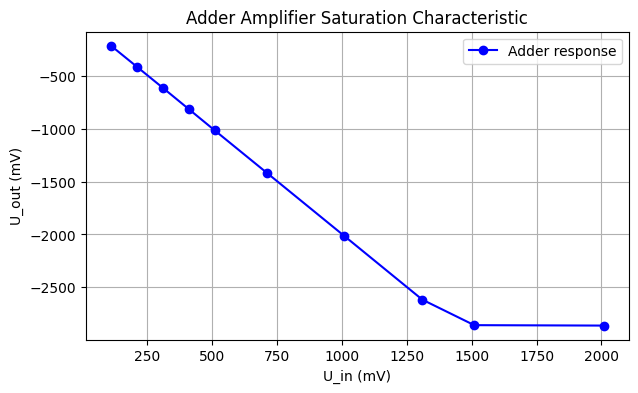

In [2]:
#m2 adder

import matplotlib.pyplot as plt
import numpy as np

# New data showing saturation
U_in_adder = np.array([110, 210, 310, 410, 510, 710, 1010, 1310, 1510, 2010])
U_out_adder = np.array([-210, -410, -610, -812, -1014, -1415, -2017, -2620, -2862, -2866])

# Plot
plt.figure(figsize=(7, 4))
plt.plot(U_in_adder, U_out_adder, 'o-', color='blue', label='Adder response')
plt.xlabel("U_in (mV)")
plt.ylabel("U_out (mV)")
plt.title("Adder Amplifier Saturation Characteristic")
plt.grid(True)
plt.legend()
plt.show()


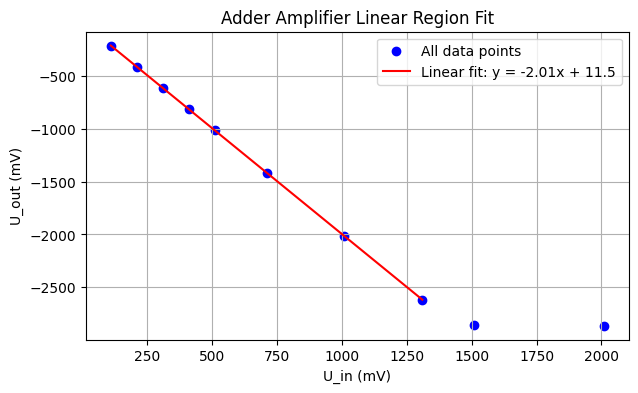

,Parameter,Value
0,Slope,-2.008801
1,Intercept,11.538478


In [6]:
#fit on linear region
# Import required libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Define data again since variables don't persist between cells
U_in_adder = np.array([110, 210, 310, 410, 510, 710, 1010, 1310, 1510, 2010])
U_out_adder = np.array([-210, -410, -610, -812, -1014, -1415, -2017, -2620, -2862, -2866])

# Select first 8 points for linear fit
U_in_linear = U_in_adder[:8]
U_out_linear = U_out_adder[:8]

# Fit linear model
model_adder = LinearRegression()
model_adder.fit(U_in_linear.reshape(-1,1), U_out_linear)

slope_adder = model_adder.coef_[0]
intercept_adder = model_adder.intercept_

# Plot data and fit
plt.figure(figsize=(7, 4))
plt.scatter(U_in_adder, U_out_adder, color='blue', label='All data points')
plt.plot(U_in_linear, model_adder.predict(U_in_linear.reshape(-1,1)), 
         color='red', label=f'Linear fit: y = {slope_adder:.2f}x + {intercept_adder:.1f}')
plt.xlabel("U_in (mV)")
plt.ylabel("U_out (mV)") 
plt.title("Adder Amplifier Linear Region Fit")
plt.grid(True)
plt.legend()
plt.show()

# Print fit parameters
results_adder = pd.DataFrame({
    "Parameter": ["Slope", "Intercept"],
    "Value": [slope_adder, intercept_adder]
})
results_adder




In [ ]:
#M3 voltage follower

import matplotlib.pyplot as plt




In [2]:
import pandas as pd

data = {
    'U_in (mV)': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
    'U_out (mV)': [110, 112, 114, 120, 125, 120, 120, 122, 130, 125, 110, 100, 95, 93, 80, 70, 60, 55],
    'f (kHz)': [1, 2, 5, 10, 20, 50, 100, 200, 500, 700, 800, 825, 850, 900, 950, 1000, 1100, 1200],
    'A': [1.1, 1.12, 1.14, 1.2, 1.25, 1.2, 1.2, 1.22, 1.3, 1.25, 1.1, 1, 0.95, 0.93, 0.8, 0.7, 0.6, 0.55]
}

df_m3 = pd.DataFrame(data)
df_m3


,U_in (mV),U_out (mV),f (kHz),A
0,100,110,1,1.10
1,100,112,2,1.12
2,100,114,5,1.14
3,100,120,10,1.20
4,100,125,20,1.25
5,100,120,50,1.20
6,100,120,100,1.20
7,100,122,200,1.22
8,100,130,500,1.30
9,100,125,700,1.25


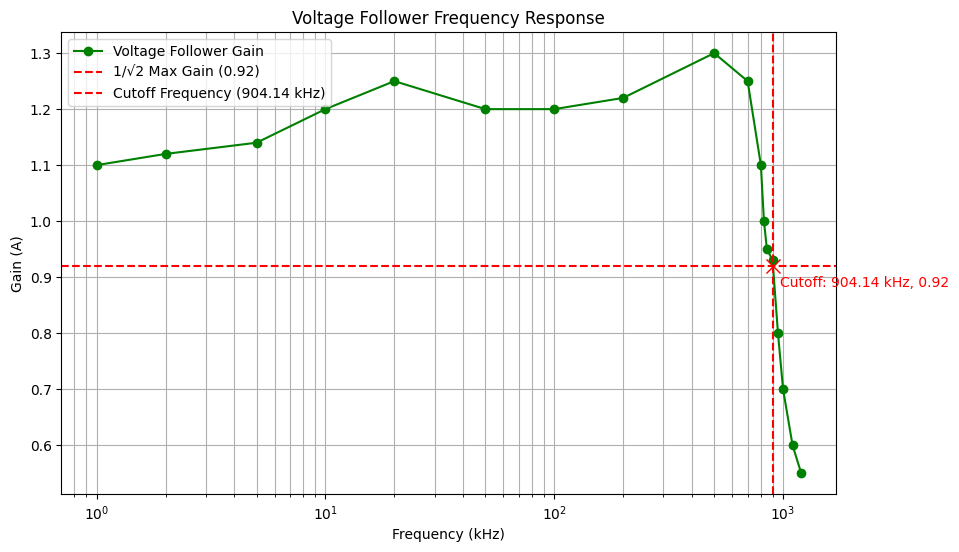

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the frequency response of the voltage follower
plt.figure(figsize=(10, 6))
plt.plot(df_m3['f (kHz)'], df_m3['A'], 'o-', color='green', label='Voltage Follower Gain')
plt.xscale('log')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Gain (A)")
plt.title("Voltage Follower Frequency Response")
plt.grid(True, which="both", ls="-")

# Calculate 1/sqrt(2) point
max_gain = df_m3['A'].max()
cutoff_gain = max_gain / np.sqrt(2)

# Find the frequency closest to the cutoff gain (assuming descending gain after peak)
# This is a simplified approach, a more accurate interpolation could be used for continuous data
cutoff_freq = None
for i in range(len(df_m3['A']) - 1):
    if df_m3['A'].iloc[i] >= cutoff_gain and df_m3['A'].iloc[i+1] < cutoff_gain:
        # Simple linear interpolation
        f1, f2 = df_m3['f (kHz)'].iloc[i], df_m3['f (kHz)'].iloc[i+1]
        a1, a2 = df_m3['A'].iloc[i], df_m3['A'].iloc[i+1]
        cutoff_freq = f1 + (cutoff_gain - a1) * (f2 - f1) / (a2 - a1)
        break

if cutoff_freq is not None:
    plt.axhline(y=cutoff_gain, color='red', linestyle='--', label=f'1/\u221A2 Max Gain ({cutoff_gain:.2f})')
    plt.axvline(x=cutoff_freq, color='red', linestyle='--', label=f'Cutoff Frequency ({cutoff_freq:.2f} kHz)')
    plt.plot(cutoff_freq, cutoff_gain, 'rx', markersize=10)
    plt.annotate(f'Cutoff: {cutoff_freq:.2f} kHz, {cutoff_gain:.2f}', 
                 (cutoff_freq, cutoff_gain), textcoords="offset points", xytext=(5,-15), 
                 ha='left', color='red')

plt.legend()
plt.show()
